In [1]:
from maxent_disaggregation import maxent_disagg
import numpy as np

In [2]:
mean = 10
sd = 2
shares=[0.3, 0.2, 0.5]
sds=[0.05,0.2,0.1]

In [3]:
samples, gamma = maxent_disagg(n=10000, mean_0=mean, sd_0=sd, shares=shares, sds=sds)
print(samples.sum(axis=1))

ValueError: too many values to unpack (expected 2)

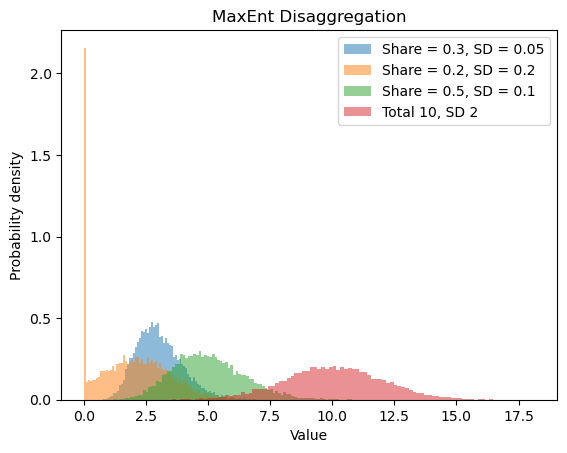

In [19]:
import matplotlib.pyplot as plt
for i in range(3):
    plt.hist(samples[:,i], bins=100, alpha=0.5, label=f'Share = {shares[i]}, SD = {sds[i]}', density=True)
plt.hist(samples.sum(axis=1), bins=100, alpha=0.5, label=f'Total {mean}, SD {sd}', density=True)
plt.legend()
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.title('MaxEnt Disaggregation')
plt.show()